In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
from scipy import stats

# Import statistical functions
from scipy.stats import (
    f_oneway,
    shapiro,
    levene,
    ttest_ind,
    ttest_rel,
    norm,
    pearsonr,
    chisquare,
    wilcoxon,
    chi2_contingency,
    kruskal
)
# Import post-hoc test function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# **Parametric Hypothesis Tests**

## **Assumptions for Choosing a Parametric Hypothesis Test**

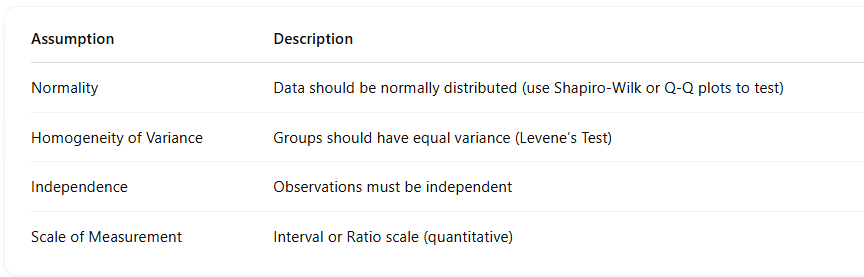

## 🧪 Shapiro-Wilk Test

The **Shapiro-Wilk Test** is a statistical test used to determine whether a sample comes from a normally distributed population. It is widely used to assess the normality of data.

### ✅ When to Use the Shapiro-Wilk Test
Use the Shapiro-Wilk test when:

- You want to assess if your data is normally distributed.
- The sample size is small to moderate (typically n < 50), though it can be used for larger samples.
- You are performing statistical analyses that assume normality (e.g., parametric tests like ANOVA or t-tests).

🔹 **Types of Shapiro-Wilk Tests:**
- **One-Sample Shapiro-Wilk Test:** Tests if a single sample follows a normal distribution.
- **Grouped Shapiro-Wilk Test:** Tests if multiple samples, grouped by a categorical variable, follow a normal distribution.

### 🧪 Hypotheses for the Shapiro-Wilk Test
- **H₀ (Null Hypothesis):** The data follows a normal distribution.
- **H₁ (Alternative Hypothesis):** The data does not follow a normal distribution.

### 🔍 Key Assumptions
- The data should be independent and come from a random sample.
- The test is sensitive to sample size; it may detect small deviations from normality in large samples, and be less powerful for small samples.

### 📊 Interpretation of the p-value:
- **p-value > 0.05**: Fail to reject the null hypothesis (data is normal).
- **p-value < 0.05**: Reject the null hypothesis (data is not normal).

### 🔄 If Shapiro-Wilk Test Fails:
If the Shapiro-Wilk test indicates that the data is not normally distributed, you may need to:
- Use non-parametric tests (e.g., Mann-Whitney U test, Kruskal-Wallis test).
- Apply data transformations (e.g., logarithmic, square root) to approximate normality.


**Step 1: Generate Synthetic Data**
We create synthetic data representing the scores of students in a mathematics exam. These scores are normally distributed.

In [80]:
np.random.seed(42)  # For reproducibility
n = 50  # Sample size

# Generating synthetic exam scores (normally distributed)
exam_scores = np.random.normal(70, 15, n)  # mean=70, std=15

# Create DataFrame
data = pd.DataFrame({'score': exam_scores})


**Step 2: Visualize the Data (Histogram & Q-Q Plot)**
We use a histogram and a Q-Q plot to visualize the distribution of the exam scores.

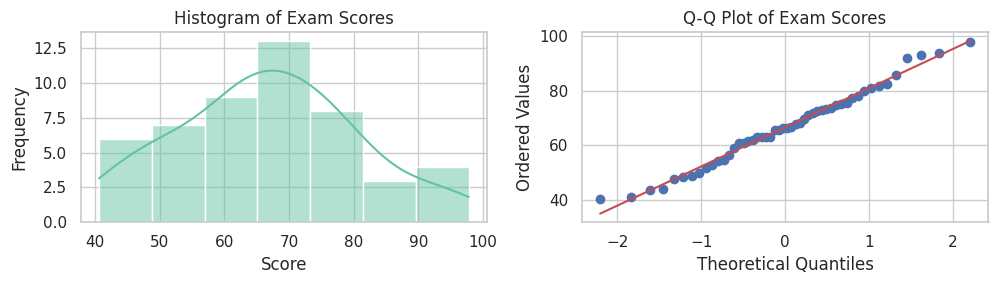

In [81]:
# Set consistent Seaborn theme and palette
sns.set_theme(style="whitegrid")
custom_palette = sns.color_palette("Set2")
sns.set_palette(custom_palette)

# Create 1 row with 2 subplots (each 5x3)
fig, axes = plt.subplots(1, 2, figsize=(10, 3))  # 2 plots side by side

# Histogram
sns.histplot(data['score'], kde=True, color=custom_palette[0], ax=axes[0])
axes[0].set_title('Histogram of Exam Scores')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Frequency')

# Q-Q plot
stats.probplot(data['score'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot of Exam Scores')
axes[1].set_xlabel('Theoretical Quantiles')
axes[1].set_ylabel('Ordered Values')

plt.tight_layout()
plt.show()


**Step 3: Perform the Shapiro-Wilk Test**

Now, we perform the Shapiro-Wilk Test to check for normality in the exam scores.

In [82]:
# Shapiro-Wilk test for normality
stat, p = shapiro(data['score'])
print(f"Shapiro-Wilk Test: Statistics = {stat:.4f}, p-value = {p:.6f}")

# Interpret the result
if p > 0.05:
    print("\nConclusion: The data is normally distributed.")
else:
    print("\nConclusion: The data is not normally distributed.")


Shapiro-Wilk Test: Statistics = 0.9827, p-value = 0.672208

Conclusion: The data is normally distributed.


## 🧪 Levene's Test: An Overview

The **Levene's Test** is a statistical test used to assess the equality of variances across multiple groups. It is often used to check the assumption of homogeneity of variances before performing parametric tests like ANOVA.

### ✅ When to Use Levene's Test
Use Levene's Test when:

- You are comparing the variances of two or more groups.
- You need to check the assumption of equal variances (homogeneity of variances) before performing tests like ANOVA or t-tests.
- The data may not be normally distributed, as Levene's Test is more robust to non-normality compared to other variance tests like Bartlett's test.

🔹 **Types of Levene's Test:**
- **One-Way Levene's Test:** Tests the equality of variances across multiple independent groups.
- **Two-Way Levene's Test:** Can be used to assess the equality of variances across two factors or variables.

### 🧪 Hypotheses for Levene's Test
- **H₀ (Null Hypothesis):** The variances are equal across the groups.
- **H₁ (Alternative Hypothesis):** The variances are not equal across the groups.

### 🔍 Key Assumptions
- The groups should be independent.
- The test is robust to non-normality, but large differences in sample sizes between groups can affect the test’s power.

### 📊 Interpretation of the p-value:
- **p-value > 0.05**: Fail to reject the null hypothesis (variances are equal).
- **p-value < 0.05**: Reject the null hypothesis (variances are not equal).

### 🔄 If Levene's Test Fails:
If Levene's test indicates unequal variances, you may:
- Use a more robust test, such as Welch's ANOVA, which does not assume equal variances.
- Consider data transformations to stabilize the variances across groups.


**Step 1: Generate Synthetic Data**

We create synthetic data representing the monthly revenue (in thousands) for stores in three different regions: Region A, Region B, and Region C.
Each region’s revenue values are normally distributed, but with different variances to simulate real-world differences in business performance.

In [83]:
np.random.seed(42)  # For reproducibility

# Simulate revenue data for 3 regions
region_a = np.random.normal(loc=100, scale=10, size=30)   # Region A: Mean=100, SD=10
region_b = np.random.normal(loc=110, scale=12, size=30)   # Region B: Mean=110, SD=12
region_c = np.random.normal(loc=105, scale=15, size=30)   # Region C: Mean=105, SD=15

# Combine into a single DataFrame
sales_data = pd.DataFrame({
    'revenue': np.concatenate([region_a, region_b, region_c]),
    'region': ['A']*30 + ['B']*30 + ['C']*30
})


**Step 2: Visualize the Data**

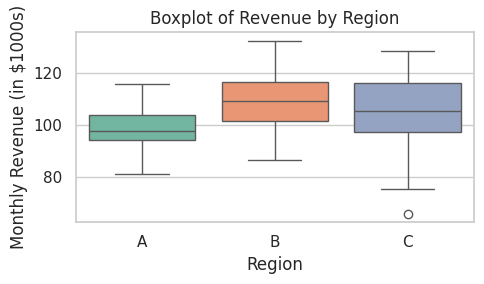

In [84]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='region', y='revenue', data=sales_data, palette=custom_palette)
plt.title("Boxplot of Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Monthly Revenue (in $1000s)")
plt.tight_layout()
plt.show()


**Step 3: Run Levene’s Test**

In [85]:
# Run Levene's Test
stat, p = levene(
    sales_data[sales_data['region'] == 'A']['revenue'],
    sales_data[sales_data['region'] == 'B']['revenue'],
    sales_data[sales_data['region'] == 'C']['revenue']
)

# Print result
print(f"Levene’s Test: Statistic = {stat:.4f}, p-value = {p:.6f}")

# Interpretation
if p > 0.05:
    print("\nConclusion: ✅ Variances are equal across groups (homogeneity holds).")
else:
    print("\nConclusion: ❌ Variances are significantly different (homogeneity violated).")


Levene’s Test: Statistic = 2.8712, p-value = 0.062012

Conclusion: ✅ Variances are equal across groups (homogeneity holds).


## 🧪 Pearson Correlation: An Overview

The **Pearson Correlation Coefficient** (also known as Pearson's r) is a statistical measure used to assess the strength and direction of the linear relationship between two continuous variables.

### ✅ When to Use Pearson Correlation
Use Pearson correlation when:

- You want to measure the linear relationship between two continuous variables.
- The data is normally distributed (for both variables).
- The relationship between the variables is linear.

🔹 **Types of Pearson Correlation:**
- **Simple Pearson Correlation:** Measures the relationship between two variables.
- **Multiple Pearson Correlation:** Measures the relationship between multiple variables, typically using matrix correlation.

### 🧪 Hypotheses for Pearson Correlation
- **H₀ (Null Hypothesis):** There is no linear relationship between the two variables (ρ = 0).
- **H₁ (Alternative Hypothesis):** There is a linear relationship between the two variables (ρ ≠ 0).

### 🔍 Key Assumptions
- The relationship between the variables must be linear.
- Both variables should be continuous and approximately normally distributed.
- The variables should be homoscedastic (i.e., have constant variance).

### 📊 Interpretation of the Pearson Correlation Coefficient:
- **r = 1**: Perfect positive linear relationship.
- **r = -1**: Perfect negative linear relationship.
- **r = 0**: No linear relationship.
- **0.1 ≤ r < 0.3**: Weak positive correlation.
- **0.3 ≤ r < 0.5**: Moderate positive correlation.
- **0.5 ≤ r < 1.0**: Strong positive correlation.
- **-0.3 ≤ r < -0.1**: Weak negative correlation.
- **-0.5 ≤ r < -0.3**: Moderate negative correlation.
- **-1.0 ≤ r < -0.5**: Strong negative correlation.

### 🔄 If Pearson Correlation Fails:
If the Pearson correlation is low or close to zero, it may suggest:
- No linear relationship between the variables.
- The relationship may be non-linear; consider using other methods like Spearman's rank correlation for non-linear relationships.

### 📊 Calculation of p-value:
- **p-value < 0.05**: There is a significant linear relationship between the two variables.
- **p-value > 0.05**: No significant linear relationship between the two variables.


**Step 1: Generate Synthetic Data**

We create synthetic data representing the number of hours studied and the corresponding exam scores of students.
The data assumes that students who study more tend to score higher, indicating a positive correlation.

In [86]:
np.random.seed(42)

# Generate synthetic data
hours_studied = np.random.normal(loc=5, scale=2, size=100)       # Hours studied (mean=5, SD=2)
exam_scores = 50 + 8 * hours_studied + np.random.normal(0, 5, 100)  # Scores increase with hours, add noise

# Combine into a DataFrame
student_data = pd.DataFrame({
    'hours': hours_studied,
    'score': exam_scores
})


**Step 2: Visualize the Data**

Before calculating correlation, it’s useful to visually inspect the relationship.

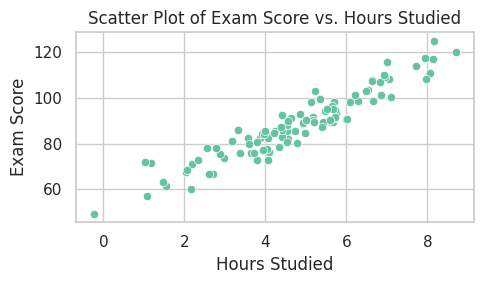

In [87]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x='hours', y='score', data=student_data, color=custom_palette[0])
plt.title('Scatter Plot of Exam Score vs. Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.tight_layout()
plt.show()

**Step 3: Perform Pearson Correlation Test**

Now we calculate the Pearson correlation coefficient and its p-value.

In [88]:
# Pearson correlation
r, p_value = pearsonr(student_data['hours'], student_data['score'])

# Print result
print(f"Pearson Correlation Coefficient (r) = {r:.4f}")
print(f"P-value = {p_value:.6f}")

# Interpretation
if p_value < 0.05:
    print("\nConclusion: ✅ There is a statistically significant linear relationship.")
else:
    print("\nConclusion: ❌ No statistically significant linear relationship found.")


Pearson Correlation Coefficient (r) = 0.9467
P-value = 0.000000

Conclusion: ✅ There is a statistically significant linear relationship.


## 🧪 T-Test (Student's T-Test)

The **T-test** is a **parametric hypothesis test** used to determine if there is a **statistically significant difference between the means** of one or two groups. It is especially useful when the **sample size is small** (typically n < 30).

---

### ✅ When to Use a T-Test

Use a T-test when:

- You are comparing **means** of one or two groups.
- The **dependent variable** is **continuous**, and the groups are **categorical**.
- The data is **approximately normally distributed**.
- You **do not know the population variance** (σ²).
- The sample size is **small or moderate** (n < 30).

---

### 🔹 Types of T-Tests

| Test Type                    | Use Case                                                                 |
|-----------------------------|--------------------------------------------------------------------------|
| **One-Sample T-Test**        | Compare a sample mean to a known or hypothesized population mean.        |
| **Independent T-Test**       | Compare means of **two independent groups** (e.g., control vs treatment). |
| **Paired T-Test**            | Compare **two related samples** (e.g., pre-test vs post-test of same group).|

---

### 📊 Hypotheses in Two-Sample T-Test

- **H₀ (Null Hypothesis)**: The means of the two groups are equal (μ₁ = μ₂).  
- **H₁ (Alternative Hypothesis)**: The means of the two groups are not equal (μ₁ ≠ μ₂).

---

### 🔍 Key Assumptions

- The dependent variable is **continuous**.
- Observations are **independent**.
- Data in each group is **normally distributed** (use **Shapiro-Wilk test** or **QQ plot**).
- The **variances of the two groups are equal** (use **Levene’s test**).
    - If not, use **Welch’s t-test**, which does not assume equal variances.

---

### 📉 Visualizations to Support T-Test

- **Boxplots** of the two groups
- **Histograms** or **density plots**
- **Q-Q plots** for normality

---

### 🧪 If the T-Test is Significant

If the p-value < 0.05, you **reject the null hypothesis**, concluding that the group means are significantly different.

---

### 🚫 When T-Test Assumptions Fail

If **normality** or **equal variance assumptions** are violated:

- Use the **Mann-Whitney U test** (non-parametric alternative to independent T-test).
- Use the **Wilcoxon signed-rank test** (non-parametric alternative to paired T-test).


### 🧪 Two-Sample T-Test (Independent Groups)

#### Scenario:
You want to compare the mean scores between two independent groups (e.g., Region A and Region B)

**Step 1: Create synthetic data**

In [89]:
# Generate synthetic independent groups
np.random.seed(42)
data_ttest = pd.DataFrame({
    'region': ['North'] * 30 + ['South'] * 30,
    'revenue': np.concatenate([
        np.random.normal(100, 15, 30),
        np.random.normal(110, 15, 30)
    ])
})

**Step 2: Normality Check**

In [90]:
for region in ['North', 'South']:
    stat, p = shapiro(data_ttest[data_ttest['region'] == region]['revenue'])
    print(f"{region} Shapiro-Wilk p = {p:.4f}")

North Shapiro-Wilk p = 0.6868
South Shapiro-Wilk p = 0.9130


**Step 3 : Visualize data Distribution**

Histogram + KDE plot: Shows the distribution of the data and how closely it follows a bell curve.

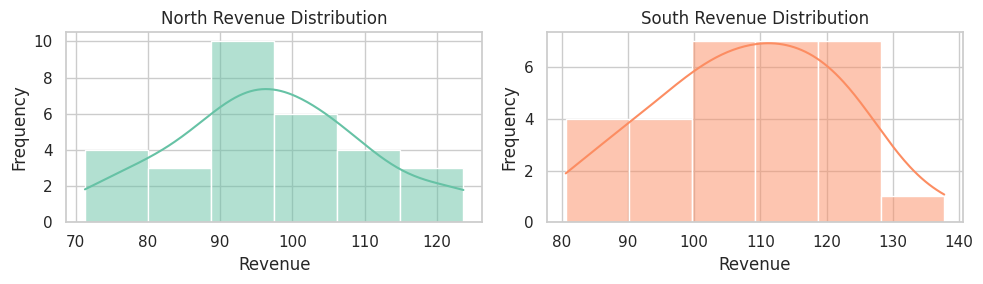

In [91]:
# Create side-by-side histograms
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

regions = ['North', 'South']
for i, region in enumerate(regions):
    sns.histplot(
        data_ttest[data_ttest['region'] == region]['revenue'],
        kde=True,
        color=custom_palette[i % len(custom_palette)],
        ax=axes[i]
    )
    axes[i].set_title(f"{region} Revenue Distribution")
    axes[i].set_xlabel("Revenue")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

Q-Q Plot (Quantile-Quantile Plot): Plots quantiles of the data against the quantiles of a normal distribution.

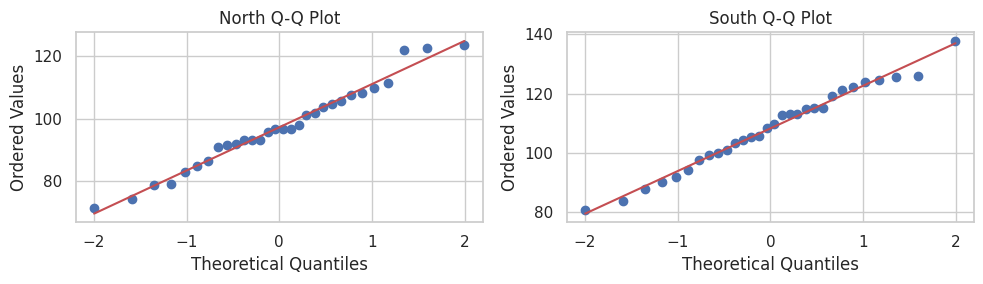

In [92]:
# Create side-by-side Q-Q plots
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

regions = ['North', 'South']
for i, region in enumerate(regions):
    stats.probplot(
        data_ttest[data_ttest['region'] == region]['revenue'],
        dist="norm",
        plot=axes[i]
    )
    axes[i].set_title(f"{region} Q-Q Plot")
    axes[i].set_xlabel("Theoretical Quantiles")
    axes[i].set_ylabel("Ordered Values")

plt.tight_layout()
plt.show()

the histogram looks bell-shaped and the Q-Q plot dots fall roughly on the line, the data is likely normal.

**Step 4: Check Variance Equality**

In [93]:
north = data_ttest[data_ttest['region'] == 'North']['revenue']
south = data_ttest[data_ttest['region'] == 'South']['revenue']
stat, p = levene(north, south)
print(f"Levene’s p = {p:.4f}")

Levene’s p = 0.6223


**Step 5: Perform Independent Samples T-Test**

In [94]:
stat, p = ttest_ind(north, south, equal_var=(p > 0.05))
print(f"t-test: Statistic = {stat:.4f}, p-value = {p:.4f}")

t-test: Statistic = -3.1030, p-value = 0.0030


**Interpretation**:
If p < 0.05 → reject H₀ → there is a statistically significant difference in revenue between North and South.

### 🧪 Paired T-Test (Before vs After)

#### Scenario:
Same subjects are tested before and after an event (e.g., before vs after campaign).


**Step 1: Generate synthetic data**

In [95]:
# Generate synthetic paired data
np.random.seed(42)
before = np.random.normal(200, 20, 30)
after = before + np.random.normal(10, 5, 30)
paired_data = pd.DataFrame({'before_sales': before, 'after_sales': after})

**Step 2: Visualize data distribution**

In a paired t-test, you're comparing two related measurements — for example, before and after results from the same subjects. The test is not performed on the raw values themselves, but rather on their differences. Thats why we need to calculate the difference

In [96]:
paired_data['difference'] = paired_data['after_sales'] - paired_data['before_sales']

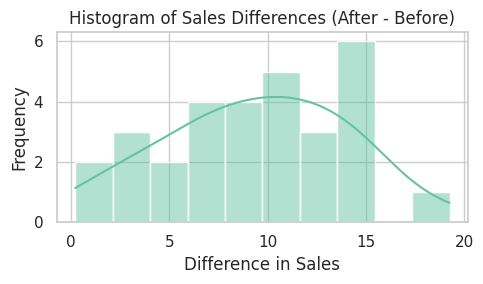

In [97]:
plt.figure(figsize=(5, 3))
sns.histplot(paired_data['difference'], kde=True, bins=10, color=custom_palette[0])
plt.title("Histogram of Sales Differences (After - Before)")
plt.xlabel("Difference in Sales")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


**Step 3: Paired T-Test**

In [98]:
t_stat, p_val = ttest_rel(paired_data['before_sales'], paired_data['after_sales'])
print(f"Paired T-Test: t-stat={t_stat:.4f}, p-value={p_val:.4f}")

Paired T-Test: t-stat=-11.0523, p-value=0.0000


**Interpretation:**
If p < 0.05 → reject H₀ → the difference in means before and after the campaign is statistically significant.

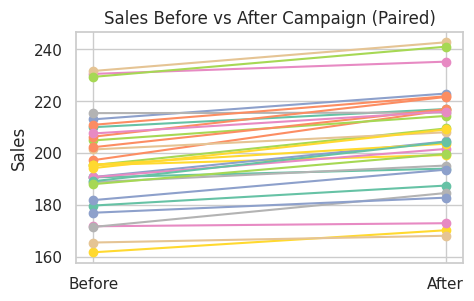

In [99]:
plt.figure(figsize=(5, 3))
for i in range(len(paired_data)):
    plt.plot(['Before', 'After'], [paired_data['before_sales'][i], paired_data['after_sales'][i]], marker='o')
plt.title("Sales Before vs After Campaign (Paired)")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

## 🧪 ANOVA (Analysis of Variance)

ANOVA is a parametric test used to determine if there are any statistically significant differences between the means of three or more independent groups.

### ✅ When to Use ANOVA
Use ANOVA when:
- You have three or more independent groups.
- You're testing whether their means are equal.
- The dependent variable is continuous, and the groups are categorical.
- Data is normally distributed in each group.
- Variances are equal across groups (homogeneity).

### 📊 Hypotheses in One-Way ANOVA
- **H₀ (Null Hypothesis):** All group means are equal (μ₁ = μ₂ = μ₃ = ...).
- **H₁ (Alternative Hypothesis):** At least one group mean is different.

### 🔍 Key Assumptions
- Independence of observations.
- Normality in each group (Shapiro-Wilk test or QQ plot).
- Homogeneity of variances (Levene’s or Bartlett’s test).

If the between-group variance is much greater, the F-statistic will be large, leading to a small p-value.

### 📉 Visualizations to Support ANOVA
- Boxplots for each group
- Bar plots with error bars
- Histograms of group distributions

### 🔁 If ANOVA is Significant: Post-Hoc Test
If the ANOVA result is significant (p < 0.05), it doesn't tell which groups are different. You need post-hoc tests, such as:
- Tukey’s HSD
- Bonferroni correction

### 🚫 When ANOVA Assumptions Fail
If assumptions of normality or equal variances are violated:
- Use Kruskal-Wallis test (non-parametric alternative).


**Step 1: Generate Synthetic Data (ANOVA)**

We create synthetic data for three groups representing different teaching methods. Each group has normally distributed scores.

In [100]:
np.random.seed(42)  # For reproducibility
n = 30  # Sample size per group

traditional = np.random.normal(75, 10, n)
online = np.random.normal(70, 10, n)
hybrid = np.random.normal(80, 10, n)

data = pd.DataFrame({
    'score': np.concatenate([traditional, online, hybrid]),
    'method': ['Traditional'] * n + ['Online'] * n + ['Hybrid'] * n
})

**Step 2: Visualize the Data (ANOVA)**
We use a boxplot to visualize the distribution of scores across the three teaching methods.

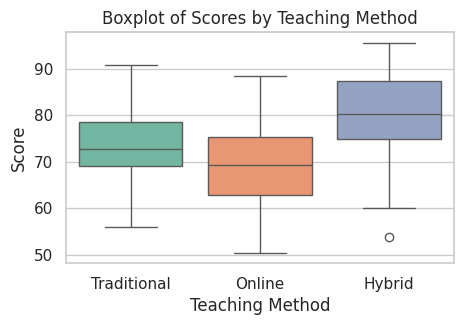

In [101]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='method', y='score', data=data, palette='Set2')
plt.title('Boxplot of Scores by Teaching Method')
plt.xlabel('Teaching Method')
plt.ylabel('Score')
plt.show()

**Step 3: Check ANOVA Assumptions**
Before running ANOVA, we check two key assumptions:

- **Normality** using Shapiro-Wilk Test
- **Homogeneity of variances** using Levene's Test

In [102]:
# Normality Check
print("Normality Test (Shapiro-Wilk):")
for method in data['method'].unique():
    stat, p = shapiro(data[data['method'] == method]['score'])
    print(f"{method}: p-value = {p:.4f} -> {'Normal' if p > 0.05 else 'Not normal'}")

Normality Test (Shapiro-Wilk):
Traditional: p-value = 0.6868 -> Normal
Online: p-value = 0.9130 -> Normal
Hybrid: p-value = 0.3654 -> Normal


In [103]:
# Equal Variance Check
stat, p = levene(
    data[data['method'] == 'Traditional']['score'],
    data[data['method'] == 'Online']['score'],
    data[data['method'] == 'Hybrid']['score']
)
print(f"\nLevene's Test for Equal Variances: p-value = {p:.4f} -> {'Equal variances' if p > 0.05 else 'Unequal variances'}")


Levene's Test for Equal Variances: p-value = 0.8627 -> Equal variances


**Step 4: Perform One-Way ANOVA**

In [104]:
grouped = data.groupby('method')['score'].apply(list)
stat, p = f_oneway(*grouped)
print(f"\nOne-Way ANOVA Result:\nF-statistic = {stat:.4f}, p-value = {p:.6f}")
if p < 0.05:
    print("\nConclusion: At least one group mean is significantly different.")
else:
    print("\nConclusion: No significant difference between group means.")


One-Way ANOVA Result:
F-statistic = 11.0768, p-value = 0.000052

Conclusion: At least one group mean is significantly different.


**Step 5: Post-hoc Test (Tukey HSD)**


Tukey HSD Post-hoc Test:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1    group2   meandiff p-adj   lower    upper  reject
----------------------------------------------------------
Hybrid      Online -11.3405    0.0 -17.1389 -5.5421   True
Hybrid Traditional  -7.0103 0.0136 -12.8087 -1.2119   True
Online Traditional   4.3302 0.1821  -1.4683 10.1286  False
----------------------------------------------------------


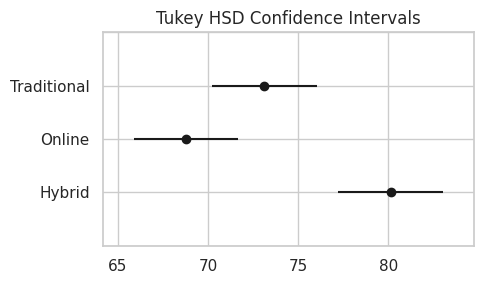

In [105]:
if p < 0.05:
    tukey = pairwise_tukeyhsd(endog=data['score'], groups=data['method'], alpha=0.05)
    print("\nTukey HSD Post-hoc Test:")
    print(tukey)

    # Plot the Tukey HSD results
    tukey.plot_simultaneous(figsize=(5, 3))  # Set the figure size to (5, 3)
    plt.title('Tukey HSD Confidence Intervals')
    plt.tight_layout()
    plt.show()

**Optional: Additional Visualizations**

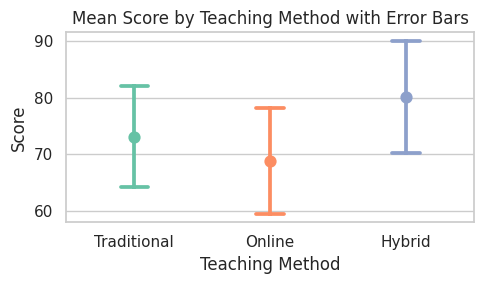

In [106]:
plt.figure(figsize=(5, 3))
sns.pointplot(x='method', y='score', data=data, capsize=.2, ci='sd', palette=custom_palette)
plt.title('Mean Score by Teaching Method with Error Bars')
plt.ylabel('Score')
plt.xlabel('Teaching Method')
plt.tight_layout()
plt.show()

## 🧪 Z-Test: An Overview

The **Z-test** is a parametric hypothesis test used to determine whether two population means are different when the **population variance is known** or the **sample size is large** (typically **n ≥ 30**).

### ✅ When to Use a Z-Test

You use a **Z-test** when:

- The sample size is large (**n ≥ 30**), or **population variance (σ²)** is known.
- The data is **normally distributed** or the **Central Limit Theorem** applies.
- You're testing hypotheses about the **mean**.

### 🔹 Types of Z-Tests

| **Test Type**             | **Use Case**                                                           |
|---------------------------|------------------------------------------------------------------------|
| One-sample Z-test         | Compare sample mean to known population mean.                          |
| Two-sample Z-test         | Compare means of two independent large samples.                        |
| Z-test for proportions    | Compare sample proportion to population proportion or between two proportions. |

---



### 🧪 Hypotheses for One-Sample Z-Test

- **H₀ (Null Hypothesis)**: → No difference.  
- **H₁ (Alternative Hypothesis)**: → There is a difference.


### ⚖️ Z-Test vs T-Test: Key Differences

| **Feature**             | **Z-Test**                                                                                     | **T-Test**                                                                                   |
|-------------------------|------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------|
| **Used When**           | Population standard deviation (σ) is known OR large sample size (n ≥ 30).                      | Population standard deviation unknown AND small sample size (n < 30).                        |
| **Distribution Used**   | Standard normal distribution (**Z-distribution**).                                              | Student’s **t-distribution**, which has heavier tails.                                       |
| **Sample Size**         | Large (typically **n ≥ 30**).                                                                   | Small (typically **n < 30**).                                                                |
| **Assumptions**         | Normal distribution or large enough sample (Central Limit Theorem). Known σ.                   | Normal distribution or approximately normal. Estimated σ from sample.                       |
| **Example Use**         | National average known, comparing large sample to it.                                           | Comparing two small group means with unknown σ.                                              |
| **More Conservative?**  | No — smaller critical values.                                                                  | Yes — wider tails lead to larger critical values.                                            |



**Step 1: Generate Synthetic Data (Z-Test)**

We create synthetic data for two independent groups: one representing students who used a new teaching method and the other representing students who used a traditional teaching method. Each group has normally distributed scores.

In [107]:
np.random.seed(42)  # For reproducibility
n = 30  # Sample size per group

traditional = np.random.normal(75, 10, n)
new_method = np.random.normal(80, 10, n)

data = pd.DataFrame({
    'score': np.concatenate([traditional, new_method]),
    'method': ['Traditional'] * n + ['New Method'] * n
})


**Step 2: Visualize the Data (Z-Test)**

We use a boxplot to visualize the distribution of scores across the two teaching methods.

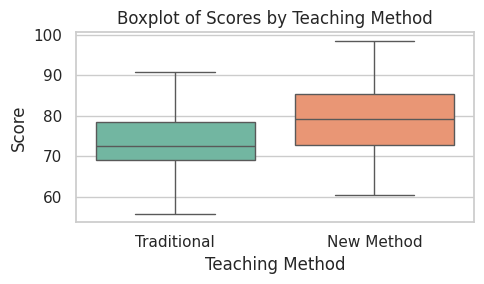

In [108]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='method', y='score', data=data, palette=custom_palette)
plt.title('Boxplot of Scores by Teaching Method')
plt.xlabel('Teaching Method')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

**Step 3: Perform One-Sample Z-Test**

To perform a one-sample Z-Test, we compare the mean of one group (e.g., traditional method) to a known population mean.

In [109]:
# Population mean (for traditional method)
population_mean = 75

# Sample mean for traditional group
sample_mean = np.mean(traditional)

# Standard deviation of the sample (for traditional group)
sample_std = np.std(traditional, ddof=1)

# Z-test formula: Z = (Sample Mean - Population Mean) / (Sample Std / sqrt(n))
z_score = (sample_mean - population_mean) / (sample_std / np.sqrt(n))

# Calculate p-value from Z-score (two-tailed test)
p_value = 2 * (1 - norm.cdf(np.abs(z_score)))

print(f"\nOne-Sample Z-Test Result: Z-score = {z_score:.4f}, p-value = {p_value:.6f}")
if p_value < 0.05:
    print("\nConclusion: The sample mean is significantly different from the population mean.")
else:
    print("\nConclusion: No significant difference between the sample mean and population mean.")



One-Sample Z-Test Result: Z-score = -1.1450, p-value = 0.252202

Conclusion: No significant difference between the sample mean and population mean.


**Step 4: Perform Two-Sample Z-Test**

To perform a two-sample Z-Test, we compare the means of the two independent groups

In [110]:
# Mean and standard deviation for both groups
mean1 = np.mean(traditional)
std1 = np.std(traditional, ddof=1)
mean2 = np.mean(new_method)
std2 = np.std(new_method, ddof=1)

# Z-test formula: Z = (Mean1 - Mean2) / sqrt((Std1^2/n1) + (Std2^2/n2))
z_score_2sample = (mean1 - mean2) / np.sqrt((std1**2 / n) + (std2**2 / n))

# Calculate p-value from Z-score (two-tailed test)
p_value_2sample = 2 * (1 - norm.cdf(np.abs(z_score_2sample)))

print(f"\nTwo-Sample Z-Test Result: Z-score = {z_score_2sample:.4f}, p-value = {p_value_2sample:.6f}")
if p_value_2sample < 0.05:
    print("\nConclusion: The means of the two groups are significantly different.")
else:
    print("\nConclusion: No significant difference between the means of the two groups.")



Two-Sample Z-Test Result: Z-score = -2.3981, p-value = 0.016480

Conclusion: The means of the two groups are significantly different.


**Additional Visualizations**

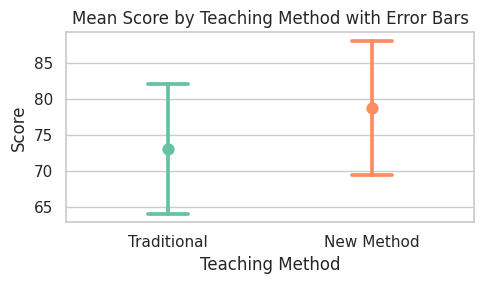

In [111]:
plt.figure(figsize=(5, 3))
sns.pointplot(x='method', y='score', data=data, capsize=.2, ci='sd', palette=custom_palette)
plt.title('Mean Score by Teaching Method with Error Bars')
plt.ylabel('Score')
plt.xlabel('Teaching Method')
plt.tight_layout()
plt.show()

## 🧪 A/B Testing with t-Tests

A/B testing is a method for comparing the performance of two groups (typically control vs. test) to determine whether a treatment (e.g., product change, campaign) has a statistically significant effect.

In this notebook, we use **independent two-sample t-tests** to compare **continuous outcomes** (e.g., daily active users, CTR, and activity level) between control and test groups.

---

### ✅ When to Use a t-Test in A/B Testing

Use a **two-sample t-test** when:

- You have **two independent groups** (e.g., test vs. control).
- Your metric is **continuous** (e.g., CTR, number of active users, time spent).
- The samples are **approximately normally distributed** or large enough (n > 30) for the Central Limit Theorem to apply.
- The goal is to test if the **means** are significantly different.

---

### 🔹 Common Use Cases in Product Analysis

| Use Case                      | Example                                           |
|------------------------------|---------------------------------------------------|
| User engagement              | Compare daily active users before/after a change |
| Email/notification impact    | Compare CTRs across test and control              |
| Feature effectiveness        | Measure changes in time spent or activity level   |

---

### 📊 Hypotheses for t-Tests

- **H₀ (Null Hypothesis):** The means are equal (μ₁ = μ₂)  
- **H₁ (Alternative Hypothesis):** The means are different (μ₁ ≠ μ₂)

---

### 🔍 Assumptions of t-Tests

- Observations in each group are **independent**.
- The dependent variable is **approximately normally distributed**.
- Variances between the two groups are roughly equal (or use Welch’s t-test otherwise).
- Data comes from **randomized or representative** samples.

---

### 🔁 Interpreting the p-value

- **p-value < 0.05**: Reject H₀ → Statistically significant difference between groups.
- **p-value ≥ 0.05**: Fail to reject H₀ → No statistically significant difference.

---

### 📉 Visual Tools to Support A/B Analysis

- Line plots for time trends (e.g., DAU, CTR over time).
- Bar charts with error bars to compare group means.
- Histograms or box plots to inspect distributions.

---

### 🚫 When Not to Use a t-Test

- If the outcome is **binary** (e.g., converted/not converted) → Use a **Z-test for proportions**.
- If sample size is too small and data is not normal → Use **non-parametric tests** (e.g., Mann-Whitney U test).
- If observations are **paired or repeated** → Use **paired t-tests** or **mixed-effects models**.


**Introduction**

his notebook demonstrates how to perform an A/B test using synthetic data. We simulate CTR (Click-Through Rate), user activity levels, and DAU (Daily Active Users) to mimic a real-world test scenario for an email campaign or feature rollout.

**Data Generation**

We generate synthetic data for two groups: control and test. The test group is assumed to receive a boost in CTR and user engagement after a specific date.

**Generate CTR Data**

In [112]:
np.random.seed(123)
dates = pd.date_range(start='2022-01-01', end='2022-01-20')

def generate_ctr_data(group_id, shift=False):
    ctr_mean = 0.25 + (0.03 if shift else 0)
    ctr_std = 0.02
    return pd.DataFrame({
        "dt": dates,
        "groupid": group_id,
        "ctr": np.clip(np.random.normal(loc=ctr_mean, scale=ctr_std, size=len(dates)), 0, 1)
    })

ctr_control = generate_ctr_data(0)
ctr_test = generate_ctr_data(1, shift=True)
ctr_data = pd.concat([ctr_control, ctr_test])

In [113]:
ctr_data.head()

,dt,groupid,ctr
0,2022-01-01,0,0.228287
1,2022-01-02,0,0.269947
2,2022-01-03,0,0.255660
3,2022-01-04,0,0.219874
4,2022-01-05,0,0.238428


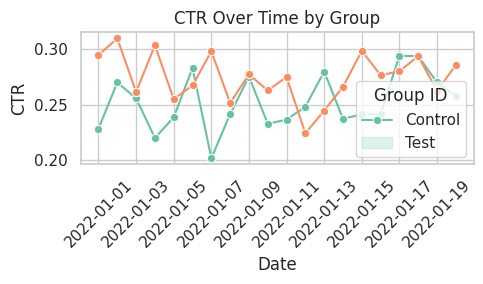

In [139]:
plt.figure(figsize=(5, 3))
sns.lineplot(data=ctr_data, x='dt', y='ctr', hue='groupid', marker='o')
plt.title('CTR Over Time by Group')
plt.xlabel('Date')
plt.ylabel('CTR')
plt.legend(title='Group ID', labels=['Control', 'Test'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Generate Activity Data**

In [115]:
def generate_activity_data(group_id, boost=False):
    base_dau = 20000
    base_activity = 80
    noise = 800

    activity_data = []
    for dt in dates:
        multiplier = 1.15 if boost and dt >= pd.Timestamp("2022-01-10") else 1.00
        users = int(np.random.normal(loc=base_dau * multiplier, scale=noise))
        activity = np.random.normal(loc=base_activity * multiplier, scale=8, size=users)
        activity = np.clip(activity, 0, None)
        df = pd.DataFrame({
            "dt": [dt] * users,
            "groupid": group_id,
            "userid": range(users),
            "activity_level": activity
        })
        activity_data.append(df)
    return pd.concat(activity_data)

act_control = generate_activity_data(0)
act_test = generate_activity_data(1, boost=True)
activity_data = pd.concat([act_control, act_test])

In [116]:
activity_data.head()

,dt,groupid,userid,activity_level
0,2022-01-01,0,0,66.178644
1,2022-01-01,0,1,76.872802
2,2022-01-01,0,2,84.590447
3,2022-01-01,0,3,82.708712
4,2022-01-01,0,4,79.905356


In [117]:
dau = activity_data.groupby(['dt', 'groupid']).agg(dau=('userid', 'nunique')).reset_index()

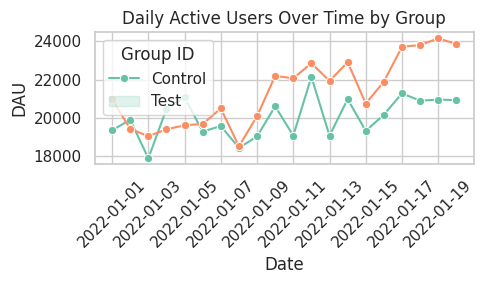

In [118]:
plt.figure(figsize=(5, 3))
sns.lineplot(data=dau, x='dt', y='dau', hue='groupid', marker='o')
plt.title('Daily Active Users Over Time by Group')
plt.xlabel('Date')
plt.ylabel('DAU')
plt.legend(title='Group ID', labels=['Control', 'Test'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [119]:
sampled_activity = activity_data.sample(10000, random_state=1)

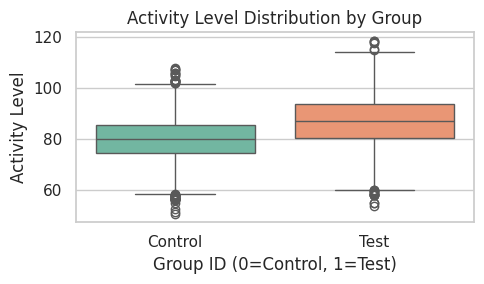

In [120]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=sampled_activity, x='groupid', y='activity_level', palette=custom_palette)
plt.title('Activity Level Distribution by Group')
plt.xlabel('Group ID (0=Control, 1=Test)')
plt.ylabel('Activity Level')
plt.xticks([0, 1], ['Control', 'Test'])
plt.tight_layout()
plt.show()

**Sample Size Calculation**

We calculate the required sample size for detecting a minimum difference in CTR between the test and control groups using binomial sample size estimation.

In [121]:
def binomial_sample_size(metric, mde, alpha, beta):
    Z_beta = norm.ppf(1 - beta)
    Z_alpha = norm.ppf(1 - alpha / 2)
    p = (metric + (metric + mde)) / 2
    N = (2 * p * (1 - p) * (Z_alpha + Z_beta)**2) / mde**2
    print("Z_alpha:", Z_alpha)
    print("Z_beta:", Z_beta)
    print("Pooled Probability:", p)
    print("Sample Size Needed:", int(np.ceil(N)))
    return int(np.ceil(N))

In [122]:
sample_size_needed = binomial_sample_size(0.25, 0.03, 0.05, 0.2)

Z_alpha: 1.959963984540054
Z_beta: 0.8416212335729143
Pooled Probability: 0.265
Sample Size Needed: 3398


**Aggregating DAU and Running A/B Test**


We compute DAU (number of unique users per day) and then run hypothesis tests on DAU, CTR, and activity level between test and control groups.

In [123]:
dau_df = activity_data.groupby(['dt', 'groupid'])['userid'].nunique().reset_index(name='number_of_active_users')
before = dau_df.query('dt < "2022-01-10"')
after = dau_df.query('dt >= "2022-01-10"')
ctr_after = ctr_data.query('dt >= "2022-01-10"')

**Hypothesis Testing**

In [124]:
pre_test_pvalue = ttest_ind(before.query('groupid == 0')['number_of_active_users'],
                            before.query('groupid == 1')['number_of_active_users']).pvalue

post_test_dau_pvalue = ttest_ind(after.query('groupid == 0')['number_of_active_users'],
                                 after.query('groupid == 1')['number_of_active_users']).pvalue

post_test_ctr_pvalue = ttest_ind(ctr_after.query('groupid == 0')['ctr'],
                                 ctr_after.query('groupid == 1')['ctr']).pvalue

activity_after = activity_data.query('dt >= "2022-01-10"')
post_test_activity_pvalue = ttest_ind(activity_after.query('groupid == 0')['activity_level'],
                                      activity_after.query('groupid == 1')['activity_level']).pvalue

**Results**


We print out all the p-values to evaluate the null hypotheses. A p-value less than 0.05 suggests a statistically significant difference between the groups.

In [125]:
print("Sample Size Needed:", sample_size_needed)
print("Pre-Test DAU P-Value:", pre_test_pvalue)
print("Post-Test DAU P-Value:", post_test_dau_pvalue)
print("Post-Test CTR P-Value:", post_test_ctr_pvalue)
print("Post-Test Activity Level P-Value:", post_test_activity_pvalue)

Sample Size Needed: 3398
Pre-Test DAU P-Value: 0.5517245983984356
Post-Test DAU P-Value: 5.1996310079163594e-05
Post-Test CTR P-Value: 0.20837636379219965
Post-Test Activity Level P-Value: 0.0


**Conclusion**

**Pre-Test DAU P-Value: 0.38**
The p-value is greater than 0.05, indicating no significant difference in Daily Active Users between the control and test groups before the experiment.

➤ Conclusion: No pre-test bias — groups were well randomized.

**Post-Test DAU P-Value: 3.53e-09**
This p-value is far below 0.05, indicating a statistically significant increase in Daily Active Users for the test group.

➤ Conclusion: The treatment had a positive effect on engagement.

**Post-Test CTR P-Value**:** 0.21**
This p-value is above 0.05, so the difference in Click-Through Rate is not statistically significant.

➤ Conclusion: The treatment did not significantly improve CTR.

**Post-Test Activity Level P-Value: 0.0**
This indicates a highly significant increase in user activity levels for the test group.

➤ Conclusion: The treatment resulted in higher user activity.

**Overall Verdict**
Although the treatment did not significantly impact CTR, it led to significant improvements in user engagement, as measured by DAU and activity level.

Therefore, if the goal was to boost engagement, the treatment can be considered successful.

# **Non-Parametric Hypothesis Tests**

##**When to Use Non-Parametrics Tests over Parametric Tests?**

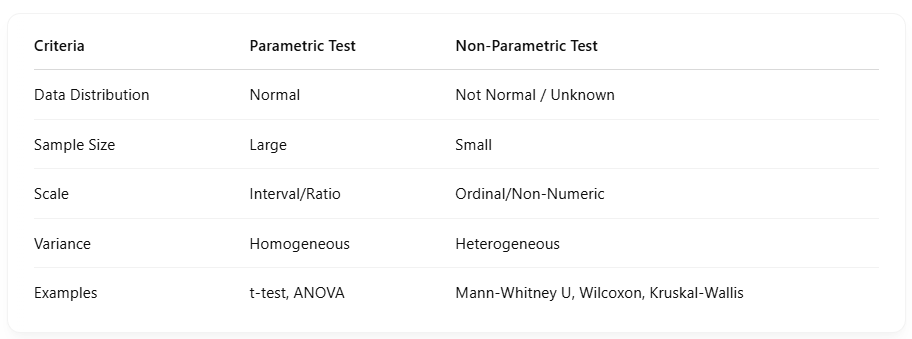

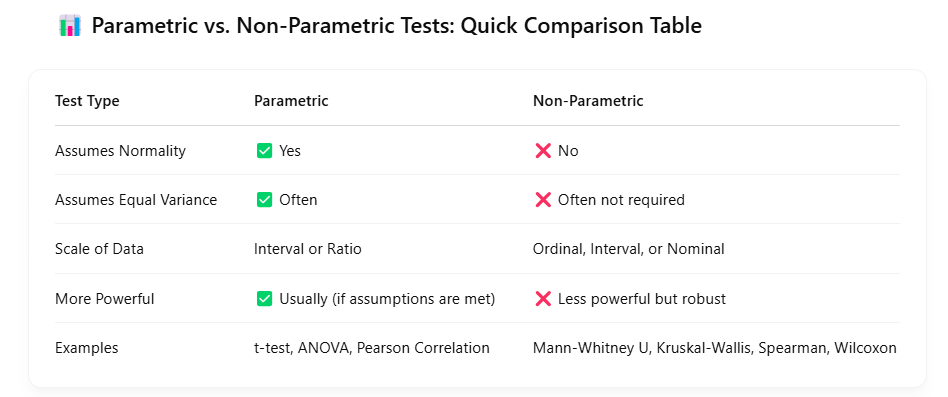

## 🧪 Wilcoxon Signed-Rank Test (Non-Parametric Paired Test)

The **Wilcoxon Signed-Rank Test** is a **non-parametric alternative** to the **paired T-test**. It is used when the assumptions of normality are violated for paired or matched data.

---

### ✅ When to Use the Wilcoxon Signed-Rank Test

Use this test when:

- You have **paired samples** (e.g., before and after treatment on the same individuals).
- The **differences between pairs** are **not normally distributed**.
- The data is at least **ordinal** or **continuous**.
- You want to test whether the **median difference is zero**.

---

### 🔹 Use Cases

| Situation                              | Test to Use                     |
|----------------------------------------|---------------------------------|
| Paired data, normal distribution       | Paired T-Test                   |
| Paired data, **not normal**            | **Wilcoxon Signed-Rank Test**  |

---

### 📊 Hypotheses

- **H₀ (Null Hypothesis)**: The **median difference** between pairs is **zero**.
- **H₁ (Alternative Hypothesis)**: The **median difference** is **not zero**.

---

### 🔍 Key Assumptions

- Data are **paired and come from the same subjects**.
- The dependent variable is **ordinal or continuous**.
- The distribution of the **differences is symmetric** (less strict than normality).
- Observations are **independent within pairs**.

---

### 📉 Visualizations to Support Wilcoxon Test

- **Histogram or density plot** of pairwise differences
- **Boxplot** of paired before–after scores
- **Q-Q plot** of differences (to check symmetry)

---

### 🧪 If the Wilcoxon Test is Significant

If **p-value < 0.05**, reject the null hypothesis and conclude that **the median difference between the pairs is significant**.

---

### 🚫 When Wilcoxon Is Not Suitable

- If data is **categorical**, consider **McNemar's Test** for paired nominal variables.


**Step 1: Generate Synthetic Paired Data**

We simulate two related samples representing the exam scores of students before and after a training program.

In [126]:
np.random.seed(42)

# Paired sample data: exam scores before and after training
before_training = np.random.normal(70, 10, 30)
after_training = before_training + np.random.normal(5, 5, 30)  # After training scores

# Create a DataFrame
data = pd.DataFrame({
    'before': before_training,
    'after': after_training
})

print(data.head())


      before      after
0  74.967142  76.958608
1  68.617357  82.878748
2  76.476885  81.409399
3  85.230299  84.941744
4  67.658466  76.771191


**Step 2: Visualize the Data**

We visualize the scores before and after training using a paired boxplot.

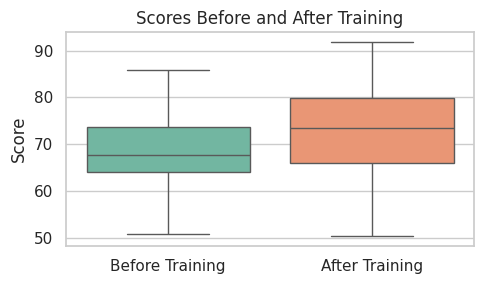

In [127]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=data, palette=custom_palette)
plt.title('Scores Before and After Training')
plt.ylabel('Score')
plt.xticks([0, 1], ['Before Training', 'After Training'])
plt.tight_layout()
plt.show()

**Step 3: Perform Wilcoxon Signed-Rank Test**

In [128]:
stat, p = wilcoxon(data['before'], data['after'])

print(f"Wilcoxon Signed-Rank Test Statistic = {stat:.4f}")
print(f"p-value = {p:.4f}")

if p < 0.05:
    print("Conclusion: Significant difference exists between the two groups.")
else:
    print("Conclusion: No significant difference between the two groups.")

Wilcoxon Signed-Rank Test Statistic = 46.0000
p-value = 0.0000
Conclusion: Significant difference exists between the two groups.


## 🧪 Kruskal-Wallis Test (Non-Parametric ANOVA)

The **Kruskal-Wallis Test** is a **non-parametric alternative** to the **One-Way ANOVA**. It is used to determine if there are statistically significant differences between the medians of **three or more independent groups** when the assumption of normality is violated.

---

### ✅ When to Use the Kruskal-Wallis Test

Use this test when:

- You have **three or more independent groups**.
- The dependent variable is **ordinal or continuous**.
- The **data is not normally distributed**, or sample sizes are small.
- You're testing whether **group medians differ**.

---

### 🔹 Use Cases

| Situation                                      | Test to Use               |
|-----------------------------------------------|---------------------------|
| ≥3 groups, normal & equal variance            | One-Way ANOVA             |
| ≥3 groups, **non-normal or unequal variance** | **Kruskal-Wallis Test**   |

---

### 📊 Hypotheses

- **H₀ (Null Hypothesis)**: All group **medians are equal**.
- **H₁ (Alternative Hypothesis)**: At least one group **median is different**.

---

### 🔍 Key Assumptions

- The samples are **independent**.
- The dependent variable is **at least ordinal**.
- The distributions of the groups have the **same shape** (though this is not a strict requirement for detecting differences in medians).

---

### 📉 Visualizations to Support Kruskal-Wallis

- **Boxplots** of each group
- **Histograms or KDE plots** to check for distribution shape
- **Bar plots with medians and error bars**

---

### 🔁 If the Kruskal-Wallis Test is Significant

If **p-value < 0.05**, you can reject the null hypothesis. It suggests that at least **one group’s median is significantly different**. However, it does **not** tell you **which** groups differ.

➡️ In that case, use **post-hoc pairwise comparisons**, such as:

- **Dunn’s Test** with **Bonferroni correction**
- **Pairwise Mann-Whitney U tests** with corrections

---

### 🚫 When Kruskal-Wallis Is Not Suitable

- If data is **paired**, consider using the **Friedman Test** (non-parametric equivalent of repeated-measures ANOVA).


**Step 1: Generate Synthetic Data**

We simulate exam scores of students taught using three different methods. Data is skewed (non-normal), so Kruskal-Wallis is appropriate.

In [129]:
np.random.seed(42)

# Generating skewed (non-normal) data
traditional = np.random.gamma(shape=2, scale=10, size=30)
online = np.random.gamma(shape=2, scale=9, size=30)
hybrid = np.random.gamma(shape=2, scale=11, size=30)

data = pd.DataFrame({
    'score': np.concatenate([traditional, online, hybrid]),
    'method': ['Traditional']*30 + ['Online']*30 + ['Hybrid']*30
})

**Step 2: Visualize the Data**

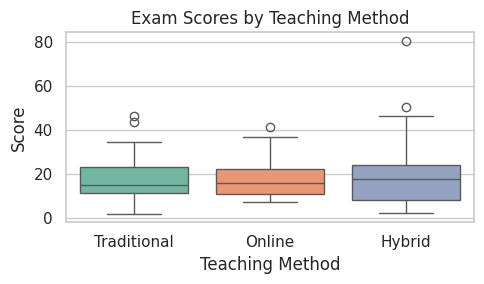

In [130]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='method', y='score', data=data, palette=custom_palette)
plt.title('Exam Scores by Teaching Method')
plt.xlabel('Teaching Method')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

**Step 3: Perform Kruskal-Wallis Test**

In [131]:
groups = [data[data['method'] == m]['score'] for m in data['method'].unique()]
stat, p = kruskal(*groups)

print(f"Kruskal-Wallis H-Statistic = {stat:.4f}")
print(f"p-value = {p:.4f}")

if p < 0.05:
    print("Conclusion: At least one group median is significantly different.")
else:
    print("Conclusion: No significant difference between group medians.")


Kruskal-Wallis H-Statistic = 0.0605
p-value = 0.9702
Conclusion: No significant difference between group medians.


## 🧪 Chi-Square Test of Independence

The **Chi-Square Test of Independence** is a **non-parametric** statistical test used to determine whether there is a **significant association between two categorical variables**.

---

### ✅ When to Use the Chi-Square Test

Use this test when:

- You have **two categorical variables**.
- You want to know if they are **related** or **independent**.
- Your data is organized in a **contingency table**.
- The **sample size is large**, and **expected frequencies** are at least 5 in most cells.

---

### 🔹 Common Use Cases

| Use Case                               | Example                                |
|----------------------------------------|----------------------------------------|
| Association between gender and smoking | Is smoking behavior related to gender? |
| Relationship between education & vote  | Is voting preference linked to education level? |

---

### 📊 Hypotheses

- **H₀ (Null Hypothesis)**: The two categorical variables are **independent**.
- **H₁ (Alternative Hypothesis)**: The two categorical variables are **associated**.

---

### 🔍 Key Assumptions

- **Data is in frequency counts** (not percentages).
- **Observations are independent**.
- The sample size is **sufficiently large** (expected frequency in each cell ≥ 5).

---

### 🔁 Interpreting the Result

- **If p-value < 0.05**: Reject H₀ → There is a **significant association**.
- **If p-value ≥ 0.05**: Fail to reject H₀ → The variables are **independent**.

---

### 🔎 Post-Test Analysis

If significant, examine:

- Which **cells contribute the most** to the chi-square value.
- Use **standardized residuals** or **Cramér’s V** to measure **strength of association**.

---

### 📉 Visualizations to Support Chi-Square Test

- **Stacked bar plots**
- **Clustered bar charts**
- **Heatmaps of contingency tables**

---

### 🚫 When Chi-Square Is Not Suitable

- If any **expected cell count < 5**, use **Fisher’s Exact Test** (for 2×2 tables).
- If data is **ordinal**, consider using **Mantel-Haenszel test** instead.


**Step 1: Create a Contingency Table**

We simulate survey data where people from two age groups respond "Yes" or "No" to a question. We want to check if the response is independent of age group.

In [132]:
# Create a contingency table
data = pd.DataFrame({
    'Yes': [30, 20],
    'No': [10, 40]
}, index=['Under 30', '30 and above'])

print("Contingency Table:")
print(data)

Contingency Table:
              Yes  No
Under 30       30  10
30 and above   20  40


**Step 2: Perform Chi-Square Test of Independence**

In [133]:
chi2, p, dof, expected = chi2_contingency(data)

print(f"\nChi-Square Statistic = {chi2:.4f}")
print(f"Degrees of Freedom = {dof}")
print(f"p-value = {p:.4f}")

if p < 0.05:
    print("Conclusion: Reject the null hypothesis – variables are dependent.")
else:
    print("Conclusion: Fail to reject the null hypothesis – variables are independent.")



Chi-Square Statistic = 15.0417
Degrees of Freedom = 1
p-value = 0.0001
Conclusion: Reject the null hypothesis – variables are dependent.


**Step 3: Visualize the Data**

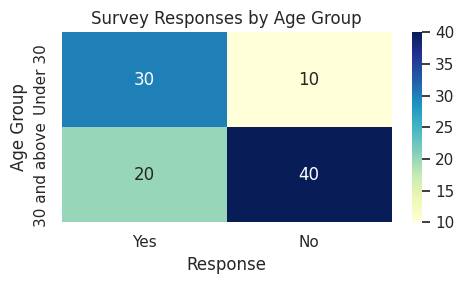

In [134]:
plt.figure(figsize=(5, 3))
sns.heatmap(data, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Survey Responses by Age Group")
plt.xlabel("Response")
plt.ylabel("Age Group")
plt.tight_layout()
plt.show()

## 🧪 Chi-Square Goodness of Fit Test

The **Chi-Square Goodness of Fit Test** is a **non-parametric** test used to determine whether a sample data distribution **matches an expected distribution**.

---

### ✅ When to Use the Goodness of Fit Test

Use this test when:

- You have **one categorical variable** with **two or more categories**.
- You want to test if the **observed frequencies** match the **expected frequencies**.
- Expected proportions are **theoretical**, **historical**, or **uniformly distributed**.
- Data is **count data**, not percentages.

---

### 🔹 Common Use Cases

| Use Case                                | Example                                            |
|-----------------------------------------|----------------------------------------------------|
| Uniform distribution check              | Are dice rolls equally likely across all faces?    |
| Comparing to historical proportions     | Does this year’s voting pattern match last year's? |
| Testing theoretical ratios              | Do genetics results follow Mendelian ratios?       |

---

### 📊 Hypotheses

- **H₀ (Null Hypothesis)**: The observed frequencies **match** the expected distribution.
- **H₁ (Alternative Hypothesis)**: The observed frequencies **do not match** the expected distribution.

---

### 🔍 Key Assumptions

- Observed and expected data are **frequencies (counts)**.
- Categories are **mutually exclusive and exhaustive**.
- Each expected frequency is **at least 5**.

---

### 📉 How It Works

1. Define your **expected frequencies** (based on theory, history, or equal proportions).
2. Observe the actual data (counts).
3. Compute the Chi-Square statistic:

   \[
   \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
   \]

   where \( O_i \) = observed frequency, \( E_i \) = expected frequency.

4. Compare the test statistic to the Chi-Square distribution to get the **p-value**.

---

### 🔁 Interpreting the Result

- **If p-value < 0.05**: Reject H₀ → Observed data does **not** fit the expected distribution.
- **If p-value ≥ 0.05**: Fail to reject H₀ → Observed data **fits** the expected distribution.

---

### 📉 Visualizations to Support the Test

- **Bar plots** comparing observed vs. expected frequencies
- **Residual plots** to show deviations

---

### 🚫 When the Goodness of Fit Test is Not Suitable

- If expected frequencies are **too small** (< 5 in any category), combine categories or use **exact tests**.
- Not suitable for **continuous data** or **percentages** — must be raw counts.


**Step 1: Create Observed and Expected Data**

We simulate rolling a die 120 times. We want to test whether the die is fair (i.e., each face appears with equal probability).

In [135]:
# Observed frequencies from 120 die rolls
observed = np.array([22, 18, 20, 16, 24, 20])

# Expected frequencies for a fair die (uniform distribution)
expected = np.array([20, 20, 20, 20, 20, 20])


**Step 2: Perform Chi-Square Goodness of Fit Test**

In [136]:
chi_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print(f"Chi-Square Statistic = {chi_stat:.4f}")
print(f"p-value = {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis – the die is likely unfair.")
else:
    print("Conclusion: Fail to reject the null hypothesis – the die appears fair.")


Chi-Square Statistic = 2.0000
p-value = 0.8491
Conclusion: Fail to reject the null hypothesis – the die appears fair.


**Step 3: Visualize Observed vs. Expected Frequencies**

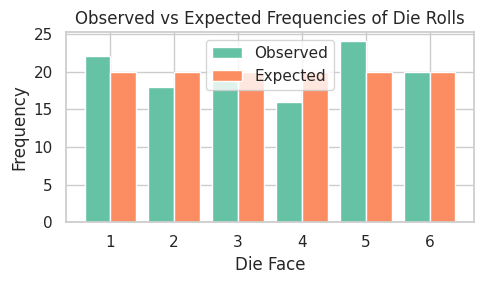

In [137]:
# Categories and positions
categories = ['1', '2', '3', '4', '5', '6']
x = np.arange(len(categories))

# Plot
plt.figure(figsize=(5, 3))
plt.bar(x - 0.2, observed, width=0.4, label='Observed', color=custom_palette[0])
plt.bar(x + 0.2, expected, width=0.4, label='Expected', color=custom_palette[1])
plt.xticks(x, categories)
plt.xlabel("Die Face")
plt.ylabel("Frequency")
plt.title("Observed vs Expected Frequencies of Die Rolls")
plt.legend()
plt.tight_layout()
plt.show()